# Задача 2

In [ ]:
%pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split
import torch.nn.functional as F
from torchmetrics import R2Score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import *



In [ ]:
dataset = pd.read_csv("/content/house.csv")
print(dataset.shape)
dataset.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
dataset.columns[dataset.isna().any()].tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

как видим, у нас есть нули, поэтому давайте их заменим на среднее значение

In [ ]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].mean())

In [ ]:
dataset.columns[dataset.isna().any()].tolist()

[]

In [ ]:
dataset.isnull().sum().sum() 

0

In [ ]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dataset.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [ ]:
# Видно, что некоторые признаки можно категоризировать
dataset['YrSold'] = dataset['YrSold'].astype('category')
dataset['SaleCondition'] = dataset['SaleCondition'].astype('category')

In [ ]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          1460 non-null   object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

## Графики

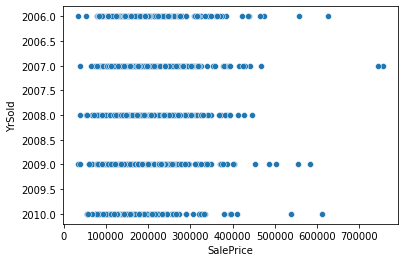

In [ ]:
sns.scatterplot(x=dataset['SalePrice'],y=dataset['YrSold'])

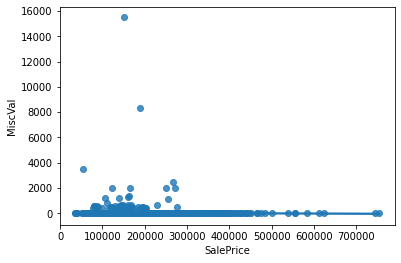

In [ ]:
sns.regplot(x=dataset['SalePrice'],y=dataset['MiscVal'])

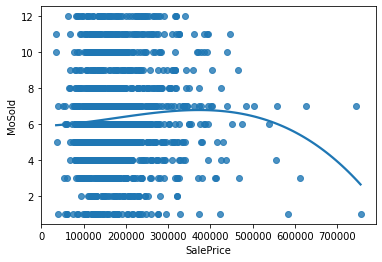

In [ ]:
sns.regplot(x=dataset['SalePrice'],y=dataset['MoSold'], data=dataset, order=3, ci=None)


## Регрессия Pytorch

In [ ]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
looking_for = 'SalePrice'

In [ ]:
encoder = preprocessing.LabelEncoder()
for y in dataset.columns:
    if(dataset[y].dtype == np.object or dataset[y].dtype == "category"):
      dataset[y]= encoder.fit_transform(dataset[y])


In [ ]:
X = dataset.drop(labels=[looking_for], axis=1)
y = dataset[looking_for]


In [ ]:
sscaler = preprocessing.StandardScaler()
X_std= sscaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=42)
X_train.shape

(1022, 80)

In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(X_train.shape[1],80) 
    self.layer2=nn.Linear(80,60) 
    self.layer3=nn.Linear(60,40) 
    self.layer4=nn.Linear(40,20) 
    self.layer5=nn.Linear(20,1) 

    
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=F.relu(self.layer3(x))
    x=F.relu(self.layer4(x))
    x=self.layer5(x)
    return x
model = NN()
print(model)

NN(
  (layer1): Linear(in_features=80, out_features=80, bias=True)
  (layer3): Linear(in_features=80, out_features=60, bias=True)
  (layer4): Linear(in_features=60, out_features=40, bias=True)
  (layer5): Linear(in_features=40, out_features=20, bias=True)
  (layer6): Linear(in_features=20, out_features=1, bias=True)
)


In [ ]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-1.4106, -0.8726, -0.0455,  ...,  0.1388,  0.3139,  0.2085],
        [ 1.7143,  2.9112,  1.5372,  ..., -1.3677,  0.3139,  0.2085],
        [ 0.0771,  0.0734, -3.2111,  ...,  1.6452, -3.5532,  0.2085],
        ...,
        [ 1.3394, -0.8726, -0.0455,  ..., -1.3677,  0.3139,  0.2085],
        [ 0.3096, -0.1631, -0.0455,  ..., -0.6144,  0.3139,  0.2085],
        [ 0.9408,  1.4923, -0.0455,  ...,  0.8920,  0.3139,  0.2085]],
       requires_grad=True)

In [ ]:
#import torch.optim as optim
loss_fn=nn.MSELoss()
optimizer= torch.optim.SGD(model.parameters(),lr=0.000000001) 

In [ ]:
epochs=3500 
losses=[]
iters=[]
for i in range(epochs):
  running_loss = 0.0
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model(x)
  loss=loss_fn(output,y)
  losses.append(running_loss+loss.item())
  iters.append(i)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%10==0):
        iters.append(i)
        losses.append(loss)
        
  if(i%100==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:38892945408.0
epochs: 100......loss:38892929024.0
epochs: 200......loss:38892912640.0
epochs: 300......loss:38892896256.0
epochs: 400......loss:38892879872.0
epochs: 500......loss:38892855296.0
epochs: 600......loss:38892847104.0
epochs: 700......loss:38892830720.0
epochs: 800......loss:38892810240.0
epochs: 900......loss:38892789760.0
epochs: 1000......loss:38892773376.0
epochs: 1100......loss:38892756992.0
epochs: 1200......loss:38892740608.0
epochs: 1300......loss:38892720128.0
epochs: 1400......loss:38892703744.0
epochs: 1500......loss:38892679168.0
epochs: 1600......loss:38892662784.0
epochs: 1700......loss:38892646400.0
epochs: 1800......loss:38892621824.0
epochs: 1900......loss:38892605440.0
epochs: 2000......loss:38892580864.0
epochs: 2100......loss:38892564480.0
epochs: 2200......loss:38892539904.0
epochs: 2300......loss:38892511232.0
epochs: 2400......loss:38892490752.0
epochs: 2500......loss:38892462080.0
epochs: 2600......loss:38892433408.0
epochs: 2700.

In [ ]:
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

Точность далеко не самая высокая, но с помощью подбора гиперпараметров её можно увеличить

In [ ]:
from sklearn.metrics import r2_score

test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

-5.462002167673025
-4.643382512619857


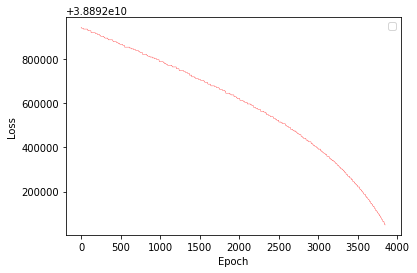

In [ ]:
plt.plot(np.arange(len(iters)),list(map(float, losses)), 'r', linewidth=0.3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

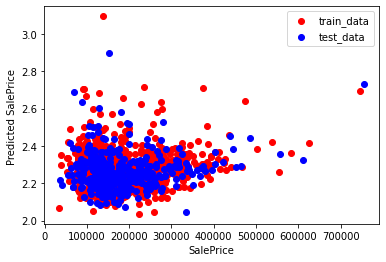

In [ ]:
plt.xlabel(looking_for)
plt.ylabel(f"Predicted {looking_for} ")
plt.scatter(y_train,y_train_pred,color='r',label="train_data")
plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

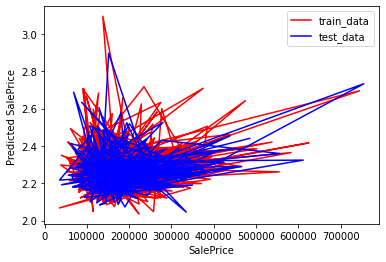

In [ ]:
plt.xlabel(looking_for)
plt.ylabel(f"Predicted {looking_for} ")
plt.plot(y_train,y_train_pred,color='r',label="train_data")
plt.plot(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

# 3 Задание

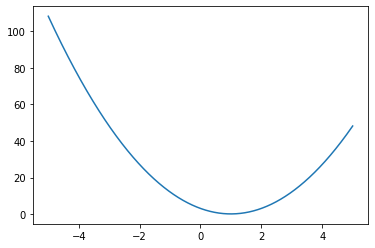

In [ ]:
import math
def f(x: torch.Tensor) -> torch.Tensor:
    return (3*(x**2) - 6*x + math.pi)


SIGN = -1 

START, END = -5, 5
EPS = 0.0000001
LR = 0.00005

X = torch.arange(START, END + 0.001, 0.001)
Y = f(X)
plt.plot(X.detach(), Y.detach());

Другой способ показа данной функции

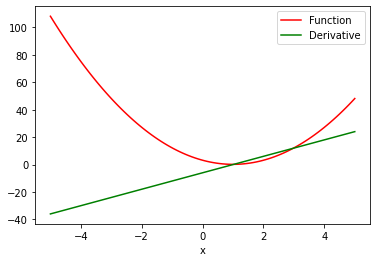

In [ ]:
import math
x = torch.linspace(-5, 5, 100, requires_grad = True)
Y = (3*(x**2) - 6*x + math.pi)
y = torch.sum(Y)
y.backward()
 
# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()